In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r"D:\DS_tasks\bank.csv"
raw_data = pd.read_csv(file_path, header=None)
print(raw_data.head())
header = raw_data.iloc[0, 0].split(';')
data = raw_data.iloc[1:, 0].str.split(';', expand=True)
data.columns = header
data.columns = data.columns.str.replace('"', '').str.strip()
data = data.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


                                                   0
0  age;"job";"marital";"education";"default";"bal...
1  30;"unemployed";"married";"primary";"no";1787;...
2  33;"services";"married";"secondary";"no";4789;...
3  35;"management";"single";"tertiary";"no";1350;...
4  30;"management";"married";"tertiary";"no";1476...


In [3]:
print(data.head(5))

  age          job  marital  education default balance housing loan   contact  \
1  30   unemployed  married    primary      no    1787      no   no  cellular   
2  33     services  married  secondary      no    4789     yes  yes  cellular   
3  35   management   single   tertiary      no    1350     yes   no  cellular   
4  30   management  married   tertiary      no    1476     yes  yes   unknown   
5  59  blue-collar  married  secondary      no       0     yes   no   unknown   

  day month duration campaign pdays previous poutcome   y  
1  19   oct       79        1    -1        0  unknown  no  
2  11   may      220        1   339        4  failure  no  
3  16   apr      185        1   330        1  failure  no  
4   3   jun      199        4    -1        0  unknown  no  
5   5   may      226        1    -1        0  unknown  no  


In [4]:
# Converting the target variable 'y' to numeric
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

In [5]:
X = data.drop('y', axis=1)
y = data['y']


In [6]:
# Converting categorical columns to numeric 
X = pd.get_dummies(X)
X

,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4520,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Building and training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8707182320441988
Precision: 0.3442622950819672
Recall: 0.21428571428571427
Confusion Matrix:
 [[767  40]
 [ 77  21]]


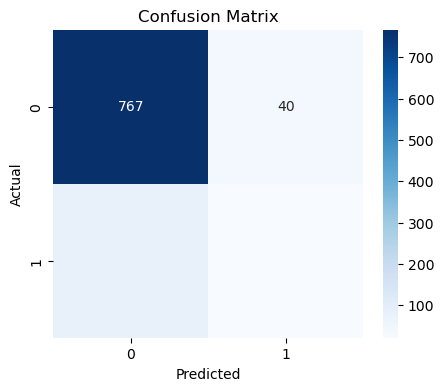

In [14]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
